# Data Analysis and Visualizations

This notebook is dedicated to the comprehensive comparison of Air Quality Index (AQI) data with our smoke impact estimator. The analysis involves assessing the correlation and patterns between AQI values and the smoke impact predicted by our estimator. Additionally, predictive modeling techniques are applied to forecast values for the next 25 years based on historical data trends.

The notebook incorporates various visualizations to enhance understanding, presenting insights into how the smoke impact estimator aligns with observed AQI trends. The predictive modeling section employs statistical methods or machine learning algorithms to forecast future smoke impact values, contributing to a forward-looking perspective.

Throughout the analysis, we aim to unveil potential relationships between our smoke impact estimates and actual air quality measurements, providing valuable insights for understanding and predicting environmental conditions associated with wildfires. The inclusion of visualizations enhances the interpretability of the findings, making the notebook a comprehensive exploration of the interplay between estimated smoke impact and observed AQI data.

In [1]:
# ---------------------------- importing packages ---------------------------- #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prophet

In [2]:
# ----------------------------- reading the data ----------------------------- #

df_aqi = pd.read_csv("data/avg-aqi-yearly.csv", index_col = False)
df_se = pd.read_csv("data/smoke-estimators.csv", index_col = False)
df_wf = pd.read_csv("data/muskogee.csv", index_col = False)

# dropping unnecessary columns
df_aqi = df_aqi.drop('Unnamed: 0', axis=1)
df_se = df_se.drop('Unnamed: 0', axis=1)

# renaming column
df_se.rename(columns = {'Fire_Year':'Year'}, inplace = True)

In [3]:
df_combined = df_aqi.merge(df_se, how = 'inner', on = 'Year')
df_combined.head(10)

,Year,Avg_AQI,GIS_Acres,Distance_From_Muskogee,Smoke_Impact
0,1989,27.233333,2370.142322,909.875764,1.087722e-06
1,1990,22.301887,1400.582180,899.639535,1.507046e-06
2,1991,25.118644,2158.249101,915.893733,3.453478e-03
3,1992,24.407407,2682.417667,945.636364,7.947425e-07
4,1993,28.844828,2125.879393,877.982143,3.610609e-03
5,1994,29.818182,2742.018612,915.757525,1.726582e-03
6,1995,29.724138,2236.448938,925.119469,3.619043e-03
7,1996,27.068966,4111.986464,978.019200,1.434223e-03
8,1997,29.945455,585.357641,942.318937,3.752838e-04
9,1998,35.600000,1632.710689,923.134276,8.225182e-05


## Predictive Model

The tool used is Prophet (learned during internship)

Prophet is a forecasting tool developed by Facebook for time series prediction. It is designed to handle data with strong seasonal patterns and multiple seasonality. Prophet is particularly useful for forecasting tasks involving daily observations that exhibit patterns such as yearly, weekly, and daily cycles.

Key features of Prophet include:

- Seasonality Handling: Prophet can handle various types of seasonality, including daily, weekly, and yearly patterns. It allows you to incorporate holidays and special events as well.

- Automatic Holidays: Prophet has the ability to automatically detect and incorporate holidays into the model, improving the accuracy of predictions during holiday periods.

- Tunable Parameters: Users can adjust hyperparameters such as seasonality strength and flexibility, allowing flexibility in adapting the model to different types of data.

- Additive or Multiplicative Components: Prophet can model time series with either additive or multiplicative components, making it adaptable to different types of patterns.

- Robustness: The model is designed to be robust to missing data points and outliers, providing a more stable performance in the presence of irregularities.

In [4]:
# copy the DataFrame for further modifications
df = df_combined.copy()

# select only the relevant columns 'Year' and 'Smoke_Impact'
df = df[['Year', 'Smoke_Impact']]

# convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# rename columns for compatibility with Prophet
df.rename(columns={'Year': 'ds', 'Smoke_Impact': 'y'}, inplace=True)

# initialize the Prophet model with weekly seasonality
model = prophet.Prophet(weekly_seasonality=True)

# fit the model using the DataFrame
model.fit(df)

# create a DataFrame for future predictions with a frequency of yearly ('Y')
predictions = model.make_future_dataframe(periods=25, freq='Y')

# generate forecast values for the future dates
forecast_values = model.predict(predictions)

# print the last 25 rows of the forecasted values with relevant columns
print(forecast_values[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25))



19:59:52 - cmdstanpy - INFO - Chain [1] start processing
19:59:52 - cmdstanpy - INFO - Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
31 2019-12-31  1.568811    0.740104    2.409260
32 2020-12-31  0.917707    0.108145    1.805838
33 2021-12-31  1.438867    0.589288    2.336869
34 2022-12-31  2.457835    1.581632    3.369326
35 2023-12-31  2.509782    1.613332    3.368684
36 2024-12-31  1.062149    0.218927    1.984125
37 2025-12-31  1.400280    0.582927    2.316911
38 2026-12-31  1.495991    0.611656    2.415291
39 2027-12-31  2.011359    1.114500    2.924150
40 2028-12-31  2.003119    1.066867    2.844329
41 2029-12-31  1.488259    0.603683    2.362724
42 2030-12-31  1.640432    0.749378    2.534001
43 2031-12-31  1.972772    1.049373    2.891958
44 2032-12-31  1.504696    0.570019    2.459177
45 2033-12-31  2.526433    1.677912    3.443429
46 2034-12-31  2.581403    1.697847    3.462830
47 2035-12-31  2.060751    1.197807    2.982944
48 2036-12-31  1.466109    0.532030    2.349101
49 2037-12-31  1.564589    0.675039    2.446380
50 2038-12-31  2.082980    1.136083    2

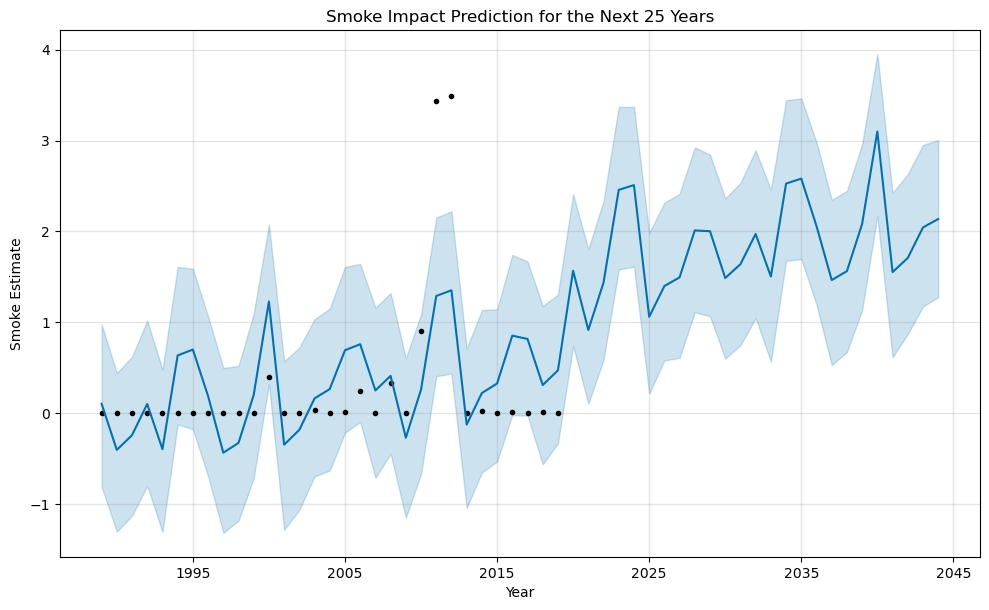

In [5]:
# --------------------------- plotting the forecast -------------------------- #

fig = model.plot(forecast_values)
plt.title('Smoke Impact Prediction for the Next 25 Years')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.show()

## Histogram every 50 miles

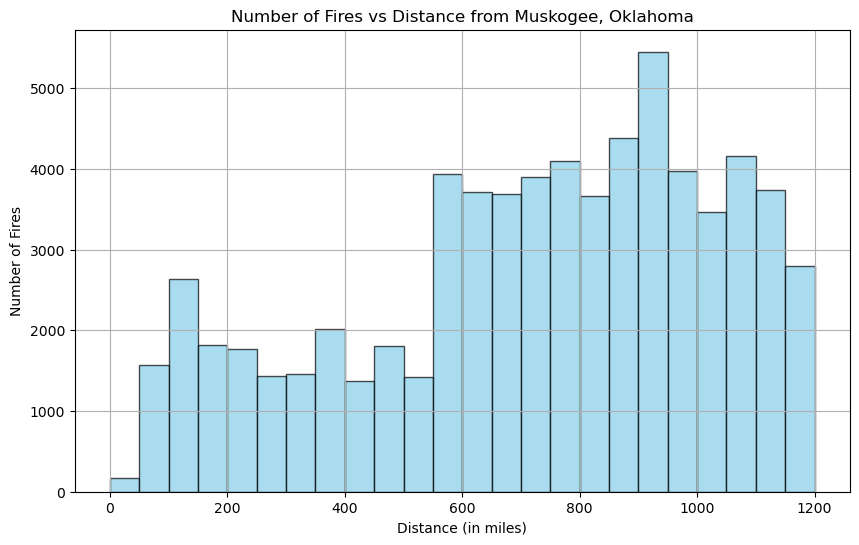

In [6]:
# extract the 'Distance_From_Muskogee' column from the DataFrame
distance = df_wf['Distance_From_Muskogee']

# calculate the maximum distance for setting the bins
max_distance = int(max(distance))

# create a histogram plot
plt.figure(figsize=(10, 6))
plt.hist(distance, bins=range(0, max_distance, 50), edgecolor='black', alpha=0.7, color='skyblue')

# set plot title and labels
plt.title('Number of Fires vs Distance from Muskogee, Oklahoma')
plt.xlabel('Distance (in miles)')
plt.ylabel('Number of Fires')
plt.grid(True)

# display the plot
plt.show()

## Time Series Graph of Total Acres Burned

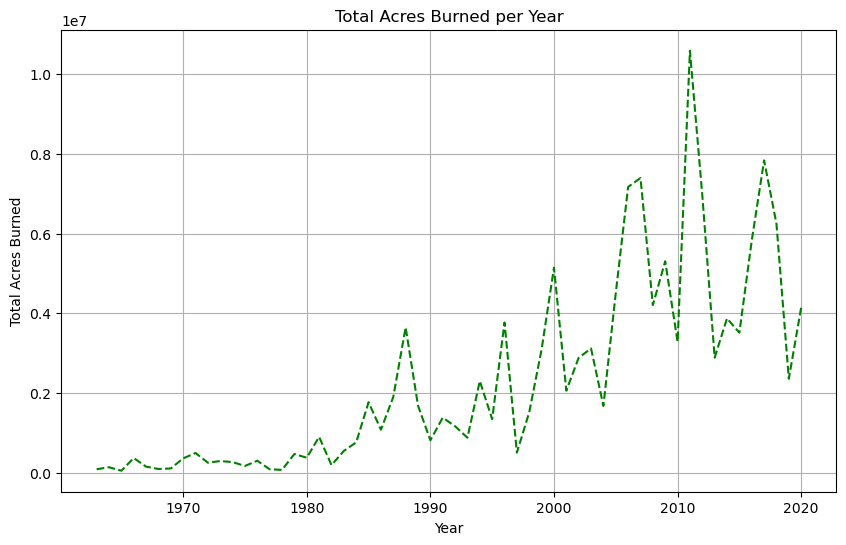

In [7]:
# create a copy of the DataFrame for analysis
df_burned = df_wf.copy()

# select only the relevant columns 'Fire_Year' and 'GIS_Acres'
df_burned = df_burned[['Fire_Year', 'GIS_Acres']]

# group by 'Fire_Year' and sum the 'GIS_Acres' within each year
df_burned = df_burned.groupby('Fire_Year').sum().reset_index()

# extract 'Fire_Year' and 'GIS_Acres' for plotting
years = df_burned['Fire_Year']
acres_burned = df_burned['GIS_Acres']

# create a line plot to visualize the total acres burned per year
plt.figure(figsize=(10, 6))
plt.plot(years, acres_burned, linestyle='--', color='green')

# set plot title and labels
plt.title('Total Acres Burned per Year')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.grid(True)

# display the plot
plt.show()


## AQI vs Smoke Estimator

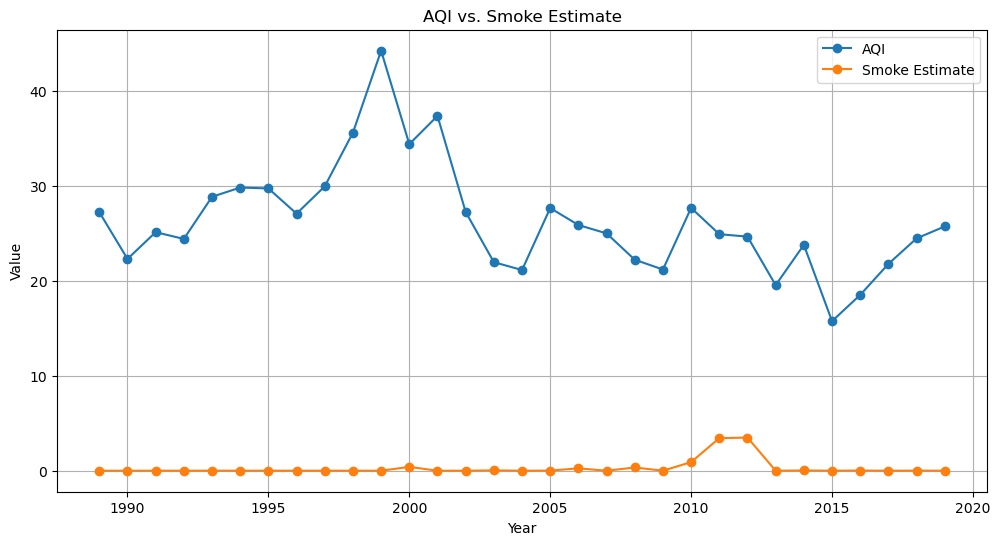

In [8]:
# extract 'Year', 'Avg_AQI', and 'Smoke_Impact' columns for plotting
year = df_combined['Year']
aqi_values = df_combined['Avg_AQI']
smoke_estimate_values = df_combined['Smoke_Impact']

# create a line plot comparing AQI and Smoke Estimate over the years
plt.figure(figsize=(12, 6))
plt.plot(year, aqi_values, label='AQI', marker='o', linestyle='-')
plt.plot(year, smoke_estimate_values, label='Smoke Estimate', marker='o', linestyle='-')

# set plot title and labels
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('AQI vs. Smoke Estimate')

# add a legend to differentiate AQI and Smoke Estimate lines
plt.legend()
plt.grid(True)

# display the plot
plt.show()


In [9]:
# -------------------- defining a min-max scaling function ------------------- #

def min_max_scale(values_list):
    min_val = min(values_list)
    max_val = max(values_list)
    scaled_values_list = [(value - min_val) / (max_val - min_val) for value in values_list]
    return scaled_values_list

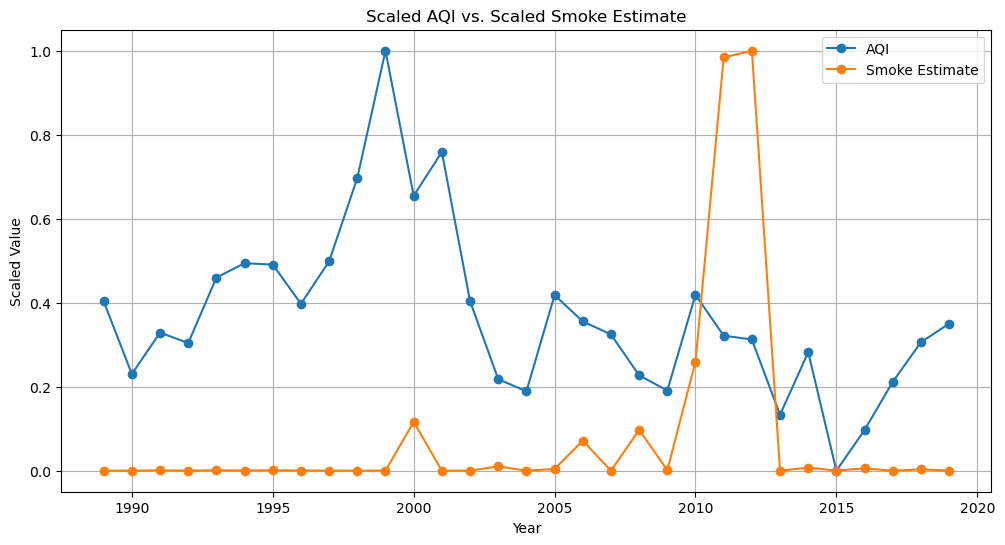

In [10]:
# min-max scaling
aqi_values = min_max_scale(df_combined['Avg_AQI'])
smoke_estimate_values = min_max_scale(df_combined['Smoke_Impact'])

year = df_combined['Year']

# create a line chart to visualize the data
plt.figure(figsize=(12, 6))
plt.plot(year, aqi_values, label='AQI', marker='o', linestyle='-')
plt.plot(year, smoke_estimate_values, label='Smoke Estimate', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Scaled Value')
plt.title('Scaled AQI vs. Scaled Smoke Estimate')
plt.legend()
plt.grid(True)
plt.show()